In [1]:
from statsconcepts.forking import *
import matplotlib.pyplot as plt
from typing import Dict, List, Set, Tuple
import numpy as np

# %matplotlib inline

In [2]:
h: Dict[str, float] = {
    "H_0": 0.,
    "H_1": 0.25,
    "H_2": 0.5,
    "H_3": 0.75,
    "H_4": 1.
}

h

{'H_0': 0.0, 'H_1': 0.25, 'H_2': 0.5, 'H_3': 0.75, 'H_4': 1.0}

In [3]:
h_c: Dict[str, Dict[str, int]] = {
    "H_0": {"W": 0, "L": 4},
    "H_1": {"W": 1, "L": 3},
    "H_2": {"W": 2, "L": 2},
    "H_3": {"W": 3, "L": 1},
    "H_4": {"W": 4, "L": 0}
}  

h_c

{'H_0': {'W': 0, 'L': 4},
 'H_1': {'W': 1, 'L': 3},
 'H_2': {'W': 2, 'L': 2},
 'H_3': {'W': 3, 'L': 1},
 'H_4': {'W': 4, 'L': 0}}

In [4]:
sample_space: Tuple[str] = ("L", "W")
sample_idx: np.array = np.random.binomial(1, 0.7, size=100)
sample: List[str] = [sample_space[i] for i in sample_idx]
print(sample)

['L', 'W', 'W', 'L', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'W', 'L', 'W', 'L', 'W', 'W', 'L', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'L', 'W', 'W', 'L', 'W', 'L', 'L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'W', 'W', 'W', 'L']


In [5]:
init_sample: List[str] = sample[:2]
init_sample

['L', 'W']

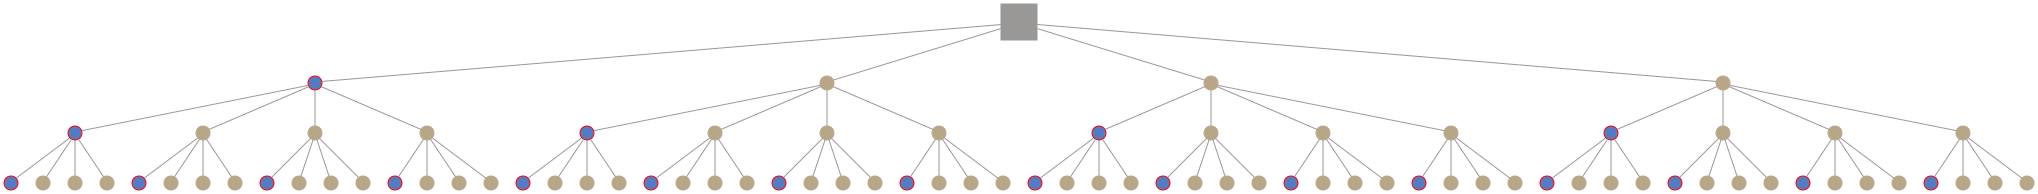

In [6]:
H_0: ForkingTree = ForkingTree(n_w=0, n_l=4, n_draws=2)
H_1: ForkingTree = ForkingTree(n_w=1, n_l=3, n_draws=3)
H_2: ForkingTree = ForkingTree(n_w=2, n_l=2, n_draws=2)
H_3: ForkingTree = ForkingTree(n_w=3, n_l=1, n_draws=2)
H_4: ForkingTree = ForkingTree(n_w=4, n_l=0, n_draws=2)
H_1.g

$$ P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

In [7]:
def add2(a: int, b: int) -> int:
    return a + b

add2(add2(2, 3), 3)

8

In [8]:
def count_paths(h: Dict[str, int], sample_in: List[str]) -> int:
    """
    Returns the number of paths in the forking tree that
    are consistent with the sample
    """
    l_in_sample: int = len(list(filter(lambda s: s == "L", sample_in)))
    w_in_sample: int = len(list(filter(lambda s: s == "W", sample_in)))
    n_paths: int = (h["W"]**w_in_sample) * (h["L"]**l_in_sample)
    return n_paths

count_paths(h=h_c["H_1"], sample_in=sample[:5])

27

In [9]:
h_c

{'H_0': {'W': 0, 'L': 4},
 'H_1': {'W': 1, 'L': 3},
 'H_2': {'W': 2, 'L': 2},
 'H_3': {'W': 3, 'L': 1},
 'H_4': {'W': 4, 'L': 0}}

In [10]:
count_paths(h=h_c["H_2"], sample_in=sample[:5])

32

In [11]:
def paths_by_hypothesis(hs: Dict[str, Dict[str, int]], sample_in: List[str]) -> pd.DataFrame:
    """
    Return df with proportions and path counts
    """
    h_labels: List[str] = [h_tmp for h_tmp, v in hs.items()]
    path_counts: List[int] = [count_paths(h=h_c[h_tmp], sample_in=sample_in) for h_tmp in h_labels]
    h_as_prop: List[float] = [float(hs[h_tmp]["W"])/(hs[h_tmp]["W"] + hs[h_tmp]["L"]) for h_tmp in h_labels]
    df_out: pd.DataFrame = pd.DataFrame({
        "h": h_labels,
        "h_prop": h_as_prop,
        "path_counts": path_counts
    })
    return df_out

paths_by_hypothesis(hs=h_c, sample_in=sample[:5])

,h,h_prop,path_counts
0,H_0,0.00,0
1,H_1,0.25,27
2,H_2,0.50,32
3,H_3,0.75,9
4,H_4,1.00,0


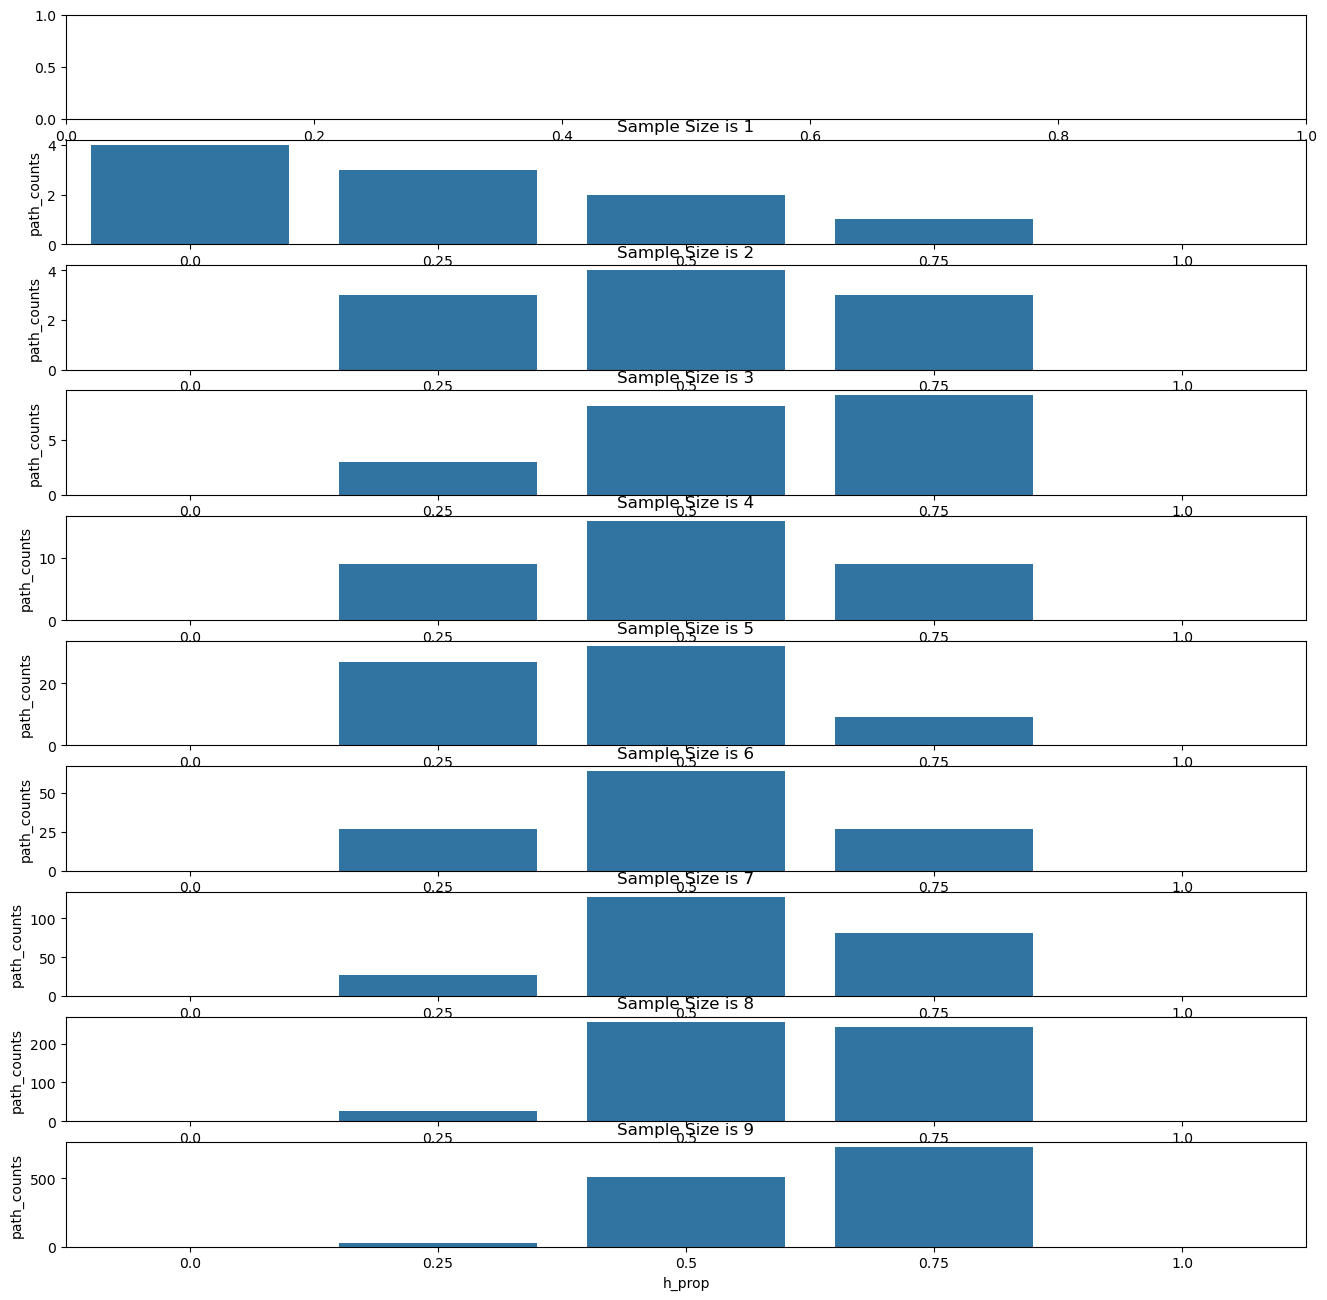

In [12]:
fig, ax = plt.subplots(10, figsize=(16, 16))
for i in range(1, 10):
    df = paths_by_hypothesis(hs=h_c, sample_in=sample[:i])
    sb.barplot(x=df["h_prop"], y=df["path_counts"], ax=ax[i])
    ax[i].set_title(f"Sample Size is {i}")

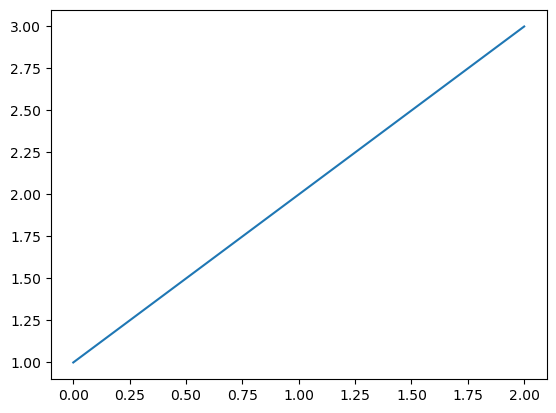

In [13]:
plt.plot([1,2,3])